In [1]:
import tensorflow as tf


In [2]:
import keras

In [3]:
import pandas

In [4]:
import sklearn

In [5]:
import matplotlib

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('housepricedata.csv')

In [8]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [9]:
dataset = df.values

In [10]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [11]:
X = dataset[:,0:10]

In [12]:
Y = dataset[:,10]

In [13]:
from sklearn import preprocessing

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [15]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [18]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [19]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [20]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [22]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 13ms/step - loss: 0.6819 - accuracy: 0.5988 - val_loss: 0.6785 - val_accuracy: 0.6256
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.6575 - val_loss: 0.6745 - val_accuracy: 0.6484
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.6996 - val_loss: 0.6704 - val_accuracy: 0.7717
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.7691 - val_loss: 0.6660 - val_accuracy: 0.7854
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.7759 - val_loss: 0.6612 - val_accuracy: 0.7808
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.7886 - val_loss: 0.6562 - val_accuracy: 0.7808
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.7847 - val_loss: 0.6509 - val_accuracy: 0.7763
Epoch 8/100


In [24]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.8721


0.8721461296081543

In [25]:
import matplotlib.pyplot as plt

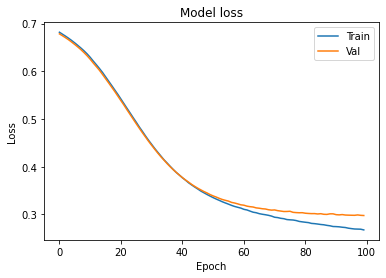

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

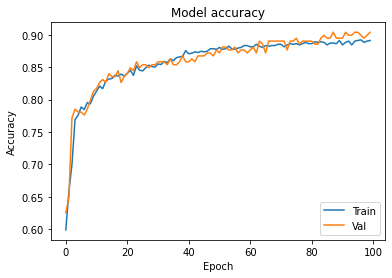

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [29]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [30]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 49ms/step - loss: 0.5071 - accuracy: 0.7358 - val_loss: 0.3492 - val_accuracy: 0.8676
Epoch 2/100
32/32 [==============================] - 1s 44ms/step - loss: 0.3596 - accuracy: 0.8581 - val_loss: 0.3218 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 1s 42ms/step - loss: 0.3198 - accuracy: 0.8669 - val_loss: 0.3174 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2797 - accuracy: 0.8904 - val_loss: 0.3098 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2494 - accuracy: 0.8963 - val_loss: 0.3193 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2674 - accuracy: 0.8904 - val_loss: 0.3658 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2777 - accuracy: 0.8885 - val_loss: 0.3246 - val_accuracy: 0.9132
Epoch 

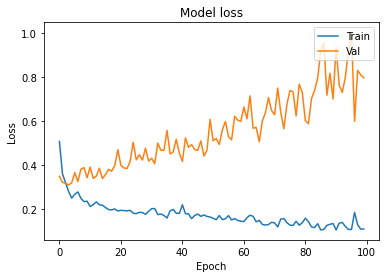

In [32]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

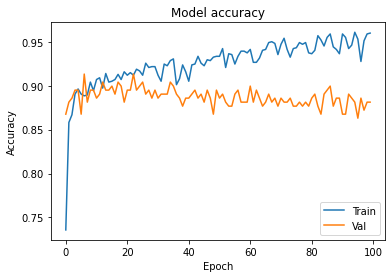

In [35]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [36]:
from keras.layers import Dropout
from keras import regularizers

In [37]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [38]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 101ms/step - loss: 14.2299 - accuracy: 0.6448 - val_loss: 3.8959 - val_accuracy: 0.7580
Epoch 2/100
32/32 [==============================] - 2s 78ms/step - loss: 1.6687 - accuracy: 0.8327 - val_loss: 0.7397 - val_accuracy: 0.8128
Epoch 3/100
32/32 [==============================] - 3s 82ms/step - loss: 0.6088 - accuracy: 0.8356 - val_loss: 0.5288 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 3s 83ms/step - loss: 0.5154 - accuracy: 0.8679 - val_loss: 0.4852 - val_accuracy: 0.9041
Epoch 5/100
32/32 [==============================] - 3s 90ms/step - loss: 0.4788 - accuracy: 0.8767 - val_loss: 0.4814 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 3s 96ms/step - loss: 0.4974 - accuracy: 0.8699 - val_loss: 0.4914 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 3s 85ms/step - loss: 0.4727 - accuracy: 0.8767 - val_loss: 0.4678 - val_accuracy: 0.9041
Epoc

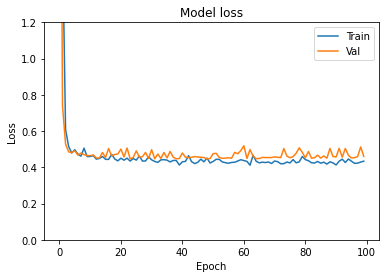

In [40]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

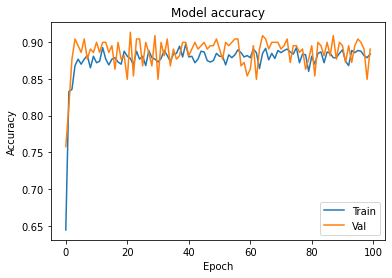

In [41]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [42]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 17s 0us/step


In [43]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [44]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [45]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


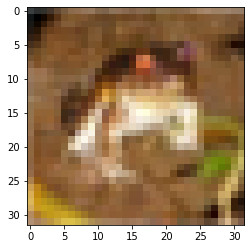

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
img = plt.imshow(x_train[0])

In [47]:
print('The label is:', y_train[0])

The label is: [6]


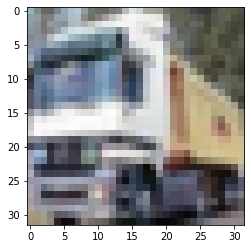

In [48]:
img = plt.imshow(x_train[1])

In [49]:
print('The label is:', y_train[1])

The label is: [9]


In [50]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [51]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [52]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [53]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [55]:
model = Sequential()

In [56]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

In [57]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [58]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [59]:
model.add(Dropout(0.25))

In [60]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [61]:
model.add(Flatten())

In [62]:
model.add(Dense(512, activation='relu'))

In [63]:
model.add(Dropout(0.5))

In [64]:
model.add(Dense(10, activation='softmax'))

In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)         

In [66]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 288s 231ms/step - loss: 1.5234 - accuracy: 0.4448 - val_loss: 1.1020 - val_accuracy: 0.6011
Epoch 2/20
1250/1250 [==============================] - 227s 182ms/step - loss: 1.1025 - accuracy: 0.6069 - val_loss: 0.9536 - val_accuracy: 0.6616
Epoch 3/20
1250/1250 [==============================] - 261s 209ms/step - loss: 0.9468 - accuracy: 0.6647 - val_loss: 0.8887 - val_accuracy: 0.6896
Epoch 4/20
1250/1250 [==============================] - 260s 208ms/step - loss: 0.8546 - accuracy: 0.6975 - val_loss: 0.7872 - val_accuracy: 0.7239
Epoch 5/20
1250/1250 [==============================] - 458s 366ms/step - loss: 0.7829 - accuracy: 0.7261 - val_loss: 0.7679 - val_accuracy: 0.7316
Epoch 6/20
1250/1250 [==============================] - 723s 578ms/step - loss: 0.7336 - accuracy: 0.7448 - val_loss: 0.7373 - val_accuracy: 0.7452
Epoch 7/20
1250/1250 [==============================] - 391s 312ms/step - loss: 0.6849 - accuracy: 0.7599 - val_

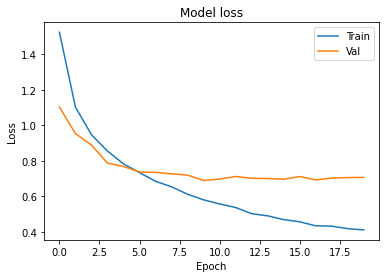

In [68]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

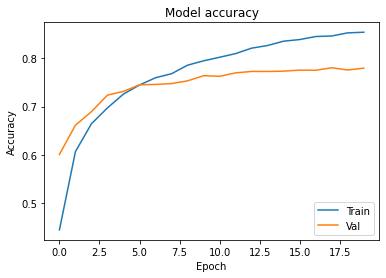

In [69]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [70]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 12s 39ms/step - loss: 0.7259 - accuracy: 0.7718


0.7717999815940857

In [71]:
model.save('my_cifar10_model.h5')

In [72]:
from keras.models import load_model
model = load_model('my_cifar10_model.h5')

In [73]:
my_image = plt.imread("cake.jpg")

In [74]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

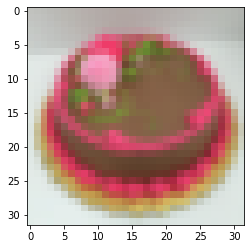

In [75]:
img = plt.imshow(my_image_resized)

In [76]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [77]:
probabilities

array([[8.5167696e-05, 1.2382520e-01, 5.3053640e-02, 1.5010923e-01,
        1.5920823e-05, 8.8394001e-02, 1.9397950e-02, 8.3128005e-05,
        5.6380153e-01, 1.2342385e-03]], dtype=float32)

In [78]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: ship -- Probability: 0.5638015
Second most likely class: cat -- Probability: 0.15010923
Third most likely class: automobile -- Probability: 0.1238252
Fourth most likely class: dog -- Probability: 0.088394
Fifth most likely class: bird -- Probability: 0.05305364
